# <b>F21AA Coursework - Amazon Reviews Analysis</b>

## <b>Step 1: Data Exploration and Visualization</b>

#### <b>1.1 Basic Data Exploration</b>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Load the dataset
train_df = pd.read_csv('train.csv')
print("First 5 rows of the dataset:")
train_df.head()

First 5 rows of the dataset:


,Score,Text
0,5,I received this product early from the seller!...
1,5,*****<br />Numi's Collection Assortment Melang...
2,5,"I was very careful not to overcook this pasta,..."
3,5,Buying this multi-pack I was misled by the pic...
4,5,These bars are so good! I loved them warmed up...


In [ ]:
print("Dataset info:")
train_df.info()

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309131 entries, 0 to 309130
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Score   309131 non-null  int64 
 1   Text    309131 non-null  object
dtypes: int64(1), object(1)
memory usage: 4.7+ MB


In [ ]:
print("Statistical summary (of 'Score'):")
train_df.describe()

Statistical summary (of 'Score'):


,Score
count,309131.000000
mean,4.180241
std,1.312151
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
train_df.groupby('Score').describe()

Text                                                                
        count  unique                                                top freq
Score                                                                        
1       28521   28385  Muir Glen cans are lined in plastic and leach ...    8
2       16287   16265  It's been some time since I've bought these, a...    3
3       23296   23248  My two traditional striped cats eat mostly dry...    3
4       43876   43792  ****<br />This is a good, albeit unexciting br...    5
5      197151  196616  Diamond Almonds<br />Almonds are a good source...   12

#### <b>1.2 Checking for missing values</b>

In [ ]:
print("Missing values in each column:")
train_df.isnull().sum()

Missing values in each column:


,0
Score,0
Text,0


#### <b>1.3 Visualization for ratings distribution</b>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

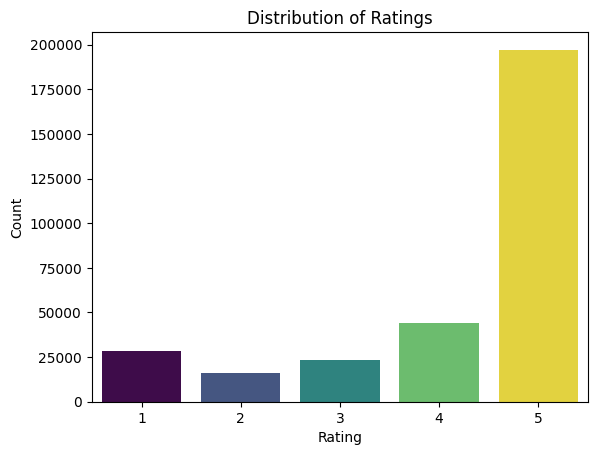

In [ ]:


plt.figure()
sns.countplot(x='Score', data=train_df, hue='Score', palette='viridis', legend=False)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

#### <b>1.4 Visualize distribution of review lengths</b>

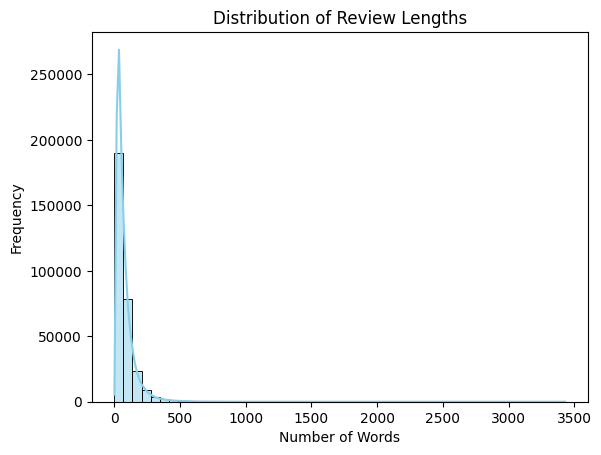

In [ ]:
train_df['Review_length'] = train_df['Text'].apply(lambda x: len(str(x).split()))
plt.figure()
sns.histplot(train_df['Review_length'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

## <b>Step 2: Text Processing and Normalization</b>

#### Importing required libraries

In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

#### <b>2.1 Text processing, tokenizing, removing stopwords and stemming/lemmatization</b>

In [ ]:
def preprocess_text(text, stem=False, lemmatize=False):
    text = text.lower()
    text = re.sub(r'http\S+', '', text) # removes URLs
    text = re.sub(r'[^\x00-\x7F]+', ' ', text) # removes non-ASCII characters
    text = re.sub(r'[^A-Za-z0-9 ]+', '', text) # keeps only letters, numbers, spaces
    text = re.sub(r'\bamazon\b', '', text)
    text = re.sub(r'\bproduct\b', '', text)
    text = re.sub(r'\bbr\b', '', text)
    # Tokenizing the text
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    if stem:
        stemmer = PorterStemmer()
        tokens = [stemmer.stem(word) for word in tokens]
    if lemmatize:
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)

#### <b>2.2 Comparison between Stemming and Lemmatizing</b>

In [ ]:
sample_list = train_df['Text'].head().tolist()

print("Comparison between Stemming and Lemmatizing:")
for x, review in enumerate(sample_list):
    print(f"Review {x+1}:")
    print(f"Original: {review}")
    print(f"Stemmed: {preprocess_text(review, stem=True)}")
    print(f"Lemmatize: {preprocess_text(review, lemmatize=True)}")

Comparison between Stemming and Lemmatizing:
Review 1:
Original: I received this product early from the seller! They are a very tastey & a Great mid-day snack. I have shared them with my Glutten Free Friends & they will be ordering this product & more very soon.
Stemmed: receiv earli seller tastey great midday snack share glutten free friend order soon
Lemmatize: received early seller tastey great midday snack shared glutten free friend ordering soon
Review 2:
Original: *****<br />Numi's Collection Assortment Melange includes:<br />5 Herbal Teas (caffeine-free, also called "teasans"):<br />* Dry Desert Lime: Lime Herbal Teasan<br />* Fields of Gold: Lemongrass Herbal Teasan<br />* Red Mellow Bush: Rooibos Herbal Teasan<br />* Bushmen's Brew: Honeybush Herbal Teasan<br />* Simply Mint: Moroccan Mint<br /><br />2 Green Teas (lower in caffeine):<br />* Temple of Heaven: Gunpowder Green Tea<br />* Monkey King: Jasmine Green Tea<br /><br />2 Black Teas (contain caffeine):<br />* Chinese Bre

#### <b>2.3 Performing lemmatization on the full dataset</b>

In [ ]:
train_df['Processed_Text'] = train_df['Text'].apply(lambda x: preprocess_text(x, lemmatize=True))
train_df[['Text', 'Processed_Text']].head()

,Text,Processed_Text
0,I received this product early from the seller!...,received early seller tastey great midday snac...
1,*****<br />Numi's Collection Assortment Melang...,numis collection assortment melange includesbr...
2,"I was very careful not to overcook this pasta,...",careful overcook pasta making sure take bite e...
3,Buying this multi-pack I was misled by the pic...,buying multipack misled picture whole hazel nu...
4,These bars are so good! I loved them warmed up...,bar good loved warmed definitely think great s...


In [ ]:
train_df[['Score', 'Processed_Text']].to_csv('reviews.csv', index=False)

## <b>Step 3: Vector Space Model and Feaure Representation </b>

In [ ]:
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
X = train_df['Processed_Text']
y = train_df['Score']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#### **Traditional Vectorization Methods**

In [ ]:
vectorizers = {
    'Binary (Unigram)' : CountVectorizer(binary=True, ngram_range=(1,1), max_features=10000),
    'Frequency (Unigram)' : CountVectorizer(ngram_range=(1,1), max_features=10000),
    'TF-IDF (Unigram)' : TfidfVectorizer(ngram_range=(1,1), max_features=10000),
    'TF-IDF (Bigram)' : TfidfVectorizer(ngram_range=(1,2), max_features=10000),
    'TF-IDF (Trigram)' : TfidfVectorizer(ngram_range=(1,3), max_features=10000)
}

In [ ]:
results = []
for name, vect in vectorizers.items():
    # Vectorizing the text
    X_train_vect = vect.fit_transform(X_train)
    X_val_vect = vect.transform(X_val)

    # Training the model
    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_train_vect, y_train)

    # Evaluating the model
    y_pred = model.predict(X_val_vect)
    accuracy = accuracy_score(y_val, y_pred)
    report = classification_report(y_val, y_pred, output_dict=True)
    weighted_f1 = report['weighted avg']['f1-score']

    results.append({
        'Vectorizer' : name,
        'Accuracy' : round(accuracy, 3),
        'Weighted F1' : round(weighted_f1,3),
        'Features' : X_train_vect.shape[1]
    })

In [ ]:
#Adding LSA
# Create a pipeline with TF-IDF and TruncatedSVD (LSA)
lsa_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,3), max_features=10000)),
    ('svd', TruncatedSVD(n_components=100, random_state=42))
])
X_train_lsa = lsa_pipeline.fit_transform(X_train)
X_val_lsa = lsa_pipeline.transform(X_val)

model_lsa = LogisticRegression(max_iter=1000, random_state=42)
model_lsa.fit(X_train_lsa, y_train)
y_pred_lsa = model_lsa.predict(X_val_lsa)
accuracy_lsa = accuracy_score(y_val, y_pred_lsa)
report_lsa = classification_report(y_val, y_pred_lsa, output_dict=True)


In [ ]:
results.append({
    'Vectorizer': 'LSA',
    'Accuracy': round(accuracy_lsa, 3),
    'Weighted F1': round(report_lsa['weighted avg']['f1-score'], 3),
    'Features': X_train_lsa.shape[1]
})

#### <b>Word Embeddings</b>

In [ ]:
!pip install --no-cache-dir numpy==1.26.4 scipy==1.13.1 gensim==4.3.3 scikit-image
from gensim.models import Word2Vec, FastText
from sklearn.decomposition import PCA
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [ ]:
sentences = [text.split() for text in train_df['Processed_Text']]

#### <b>Training and Word2Vec and FastText Model </b>

In [ ]:
# Document vector averaging function
def document_vector(model, doc):
    doc = [word for word in doc if word in model.wv]
    return np.mean(model.wv[doc], axis=0) if len(doc) > 0 else np.zeros(model.vector_size)

In [ ]:
# Initializing the models
# Word2Vec model
w2v_model = Word2Vec(
    sentences,
    vector_size=100,
    window=5,
    min_count=5,
    workers=4,
    epochs=10
)

# FastText model
ft_model = FastText(
    sentences,
    vector_size=100,
    window=5,
    min_count=5,
    workers=4,
    epochs=10,
    sg=1
)
# Doc2Vec model
# Create TaggedDocument objects for Doc2Vec training
tagged_docs = [TaggedDocument(words=sent, tags=[i]) for i, sent in enumerate(sentences)]
d2v_model = Doc2Vec(
    vector_size=100,
    window=5,
    min_count=5,
    epochs=10,
    workers=4,
    seed=42
)
d2v_model.build_vocab(tagged_docs)
d2v_model.train(tagged_docs, total_examples=d2v_model.corpus_count, epochs=d2v_model.epochs)

# Load GloVe embeddings
def load_glove_model(glove_path):
    glove_model = {}
    with open(glove_path, 'r', encoding="utf-8") as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            glove_model[word] = vector
    return glove_model

glove_path = "glove.6B.100d.txt"  # Downloading GloVe embeddings
glove_model = load_glove_model(glove_path)



In [ ]:
# Function to get document vectors using GloVe
def document_vector_glove(glove_model, doc):
    doc = [word for word in doc if word in glove_model]
    return np.mean([glove_model[word] for word in doc], axis=0) if len(doc) > 0 else np.zeros(100)

# Generate embeddings
X_w2v = np.array([document_vector(w2v_model, doc) for doc in sentences])
X_ft = np.array([document_vector(ft_model, doc) for doc in sentences])
X_d2v = np.array([d2v_model.infer_vector(doc) for doc in sentences])
X_glove = np.array([document_vector_glove(glove_model, doc) for doc in sentences])

# Split embeddings data
X_train_w2v, X_val_w2v, y_train_w2v, y_val_w2v = train_test_split(X_w2v, y, test_size=0.2, random_state=42)
X_train_ft, X_val_ft, y_train_ft, y_val_ft = train_test_split(X_ft, y, test_size=0.2, random_state=42)
X_train_d2v, X_val_d2v, y_train_d2v, y_val_d2v = train_test_split(X_d2v, y, test_size=0.2, random_state=42)
X_train_glove, X_val_glove, y_train_glove, y_val_glove = train_test_split(X_glove, y, test_size=0.2, random_state=42)

In [ ]:
# Evaluate embeddings
for name, (X_tr, X_v, y_tr, y_v) in zip(
    ['Word2Vec', 'FastText', 'Doc2Vec','glove'],
    [(X_train_w2v, X_val_w2v, y_train_w2v, y_val_w2v),
     (X_train_ft, X_val_ft, y_train_ft, y_val_ft),
     (X_train_d2v, X_val_d2v, y_train_d2v, y_val_d2v),
     (X_train_glove, X_val_glove, y_train_glove, y_val_glove)]
):
    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_v)
    report = classification_report(y_v, y_pred, output_dict=True)

    results.append({
        'Vectorizer': name,
        'Accuracy': round(report['accuracy'], 3),
        'Weighted F1': round(report['weighted avg']['f1-score'], 3),
        'Features': X_tr.shape[1]
    })

In [ ]:
results_df = pd.DataFrame(results)
results_df

,Vectorizer,Accuracy,Weighted F1,Features
0,Binary (Unigram),0.712,0.678,10000
1,Frequency (Unigram),0.710,0.675,10000
2,TF-IDF (Unigram),0.721,0.681,10000
3,TF-IDF (Bigram),0.728,0.692,10000
4,TF-IDF (Trigram),0.728,0.691,10000
5,LSA,0.679,0.606,100
6,Word2Vec,0.699,0.636,100
7,FastText,0.702,0.642,100
8,Doc2Vec,0.667,0.590,100
9,glove,0.667,0.574,100


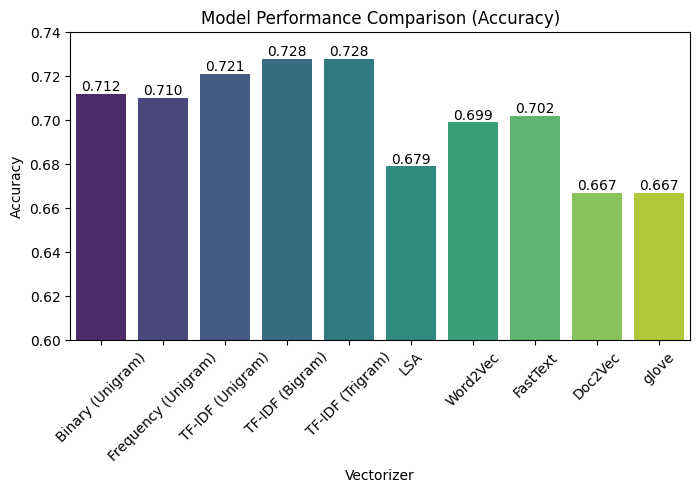

In [ ]:
# Visualization
plt.figure(figsize=(8, 4))
ax = sns.barplot(x='Vectorizer', y='Accuracy', data=results_df, hue='Vectorizer', palette='viridis', legend=False)
plt.title('Model Performance Comparison (Accuracy)')
plt.xticks(rotation=45)
plt.ylabel('Accuracy')

plt.ylim(0.6, 0.74)

for p in ax.patches:
    ax.annotate(f"{p.get_height():.3f}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

plt.show()

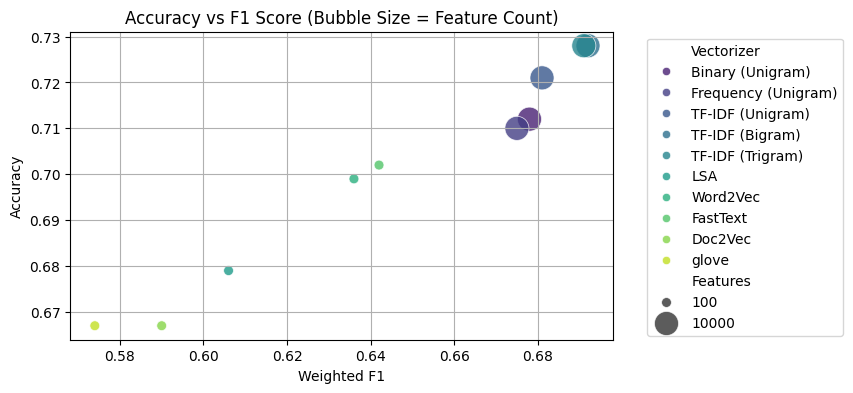

In [ ]:
plt.figure(figsize=(7, 4))
sns.scatterplot(
    data=results_df,
    x='Weighted F1',
    y='Accuracy',
    size='Features',
    hue='Vectorizer',
    palette='viridis',
    sizes=(50, 300),
    alpha=0.8
)
plt.title("Accuracy vs F1 Score (Bubble Size = Feature Count)")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## **Step 4: Model Training and Hyperparameter Tuning**

#### **4.1 Model training**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [ ]:
y_train_fixed = y_train - 1
y_val_fixed = y_val - 1

#TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_vect = tfidf_vectorizer.fit_transform(X_train)
X_val_vect = tfidf_vectorizer.transform(X_val)

#Define Models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Naïve Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=10, n_jobs=-1, random_state=42),
    'XGBoost': XGBClassifier(eval_metric='mlogloss', random_state=42)
}

#Train & Evaluate Models
results = []
best_model_name = None
best_f1 = 0

for model_name, model in models.items():
    print(f"\nTraining {model_name}...")

    # Train model
    model.fit(X_train_vect, y_train_fixed)

    # Evaluate model
    y_pred = model.predict(X_val_vect)
    accuracy = accuracy_score(y_val_fixed, y_pred)
    report = classification_report(y_val_fixed, y_pred, output_dict=True)
    weighted_f1 = report['weighted avg']['f1-score']

    # Store results
    results.append({
        'Model': model_name,
        'Accuracy': round(accuracy, 3),
        'Weighted F1': round(weighted_f1, 3),
        'Features': X_train_vect.shape[1]
    })

    # Track the best model
    if weighted_f1 > best_f1:
        best_f1 = weighted_f1
        best_model_name = model_name

# Display Results
df_results = pd.DataFrame(results)
print("\nModel Performance:")
print(df_results.sort_values(by="Weighted F1", ascending=False))

best_model = models[best_model_name]
print(f"\nBest model: {best_model_name}")


Training Logistic Regression...

Training Naïve Bayes...

Training Random Forest...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Training XGBoost...

Model Performance:
                 Model  Accuracy  Weighted F1  Features
0  Logistic Regression     0.724        0.684      5000
3              XGBoost     0.705        0.645      5000
1          Naïve Bayes     0.682        0.587      5000
2        Random Forest     0.641        0.501      5000

Best model: Logistic Regression


#### **4.2 Comparison of Model Performance: Accuracy & Weighted F1 Score**

<ipython-input-32-daa13d44db72>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


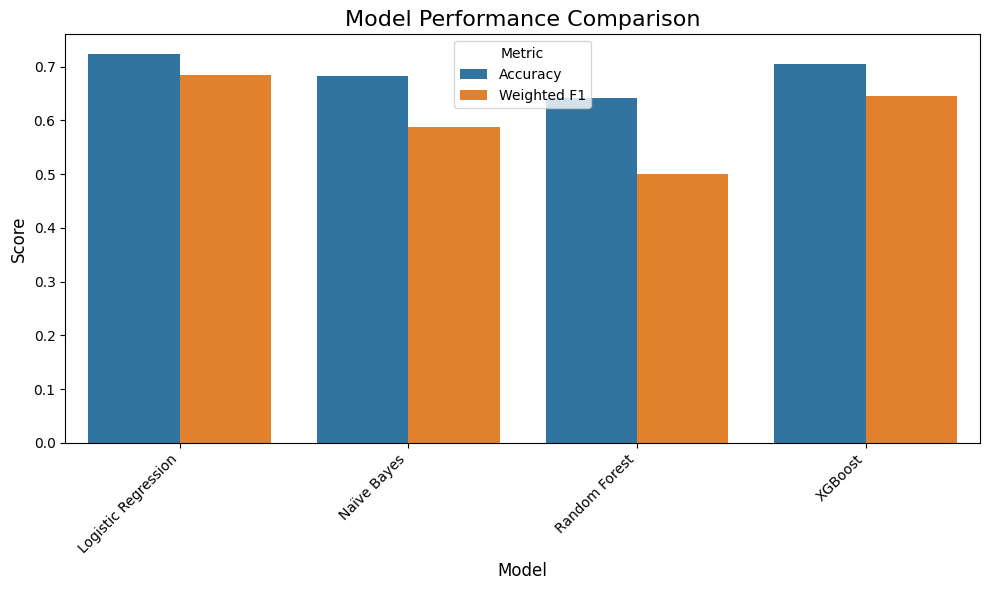

In [ ]:
# Bar chart for Accuracy and Weighted F1 Score
def plot_performance(df_results):
    fig, ax = plt.subplots(figsize=(10, 6))
    df_results = df_results.melt(id_vars='Model', value_vars=['Accuracy', 'Weighted F1'],
                                 var_name='Metric', value_name='Score')

    sns.barplot(data=df_results, x='Model', y='Score', hue='Metric', ax=ax)
    ax.set_title('Model Performance Comparison', fontsize=16)
    ax.set_xlabel('Model', fontsize=12)
    ax.set_ylabel('Score', fontsize=12)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

plot_performance(df_results)

#### <b>4.3 Hyperparameter Tuning</b>

In [ ]:
# Defining Hyperparameter Grids

# Logistic Regression
log_reg_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

# Naïve Bayes (Alpha parameter for smoothing)
nb_param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]
}

# Random Forest
rf_param_grid = {
   'n_estimators': [50, 100, 150, 200],
   'max_depth': [10, 20, 30, None],
   'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# XGBoost
xgb_param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 6],
    'subsample': [0.7, 0.9],
    'colsample_bytree': [0.7, 0.9],
}



# Dictionary of models with their respective hyperparameter grids
param_grids = {
    'Logistic Regression': (LogisticRegression(max_iter=1000, random_state=42), log_reg_param_grid),
    'Naïve Bayes': (MultinomialNB(), nb_param_grid),
    'Random Forest': (RandomForestClassifier(random_state=42, n_jobs=-1), rf_param_grid),
    'XGBoost': (XGBClassifier(eval_metric='mlogloss', random_state=42), xgb_param_grid),

}

In [ ]:
# Performing Hyperparameter Tuning
tuned_models = {}

for model_name, (model, param_grid) in param_grids.items():
    print(f"\nTuning {model_name}...")

    # Use RandomizedSearchCV for hyperparameter tuning
    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grid,
        n_iter=10,  # Number of combinations to try (adjust as needed)
        cv=3,  # 3-fold cross-validation
        scoring='f1_weighted',  # Optimize for F1-score
        n_jobs=-1,
        verbose=2,
        random_state=42
    )

    # Fit RandomizedSearchCV
    random_search.fit(X_train_vect, y_train_fixed)

    # Get the best model
    tuned_models[model_name] = random_search.best_estimator_

    # Print best parameters
    print(f"\nBest parameters for {model_name}: {random_search.best_params_}")
    print(f"Best cross-validation F1-score for {model_name}: {random_search.best_score_:.3f}")

# Naïve Bayes: Use GridSearchCV instead of RandomizedSearchCV
print("\nTuning Naïve Bayes...")
grid_search = GridSearchCV(
    estimator=MultinomialNB(),
    param_grid=nb_param_grid,
    cv=3,
    scoring='f1_weighted',
    n_jobs=-1
)
grid_search.fit(X_train_vect, y_train_fixed)

# Save the best model
tuned_models['Naïve Bayes'] = grid_search.best_estimator_

# Print best parameters
print(f"\nBest parameters for Naïve Bayes: {grid_search.best_params_}")
print(f"Best cross-validation F1-score for Naïve Bayes: {grid_search.best_score_:.3f}")


Tuning Logistic Regression...
Fitting 3 folds for each of 10 candidates, totalling 30 fits

Best parameters for Logistic Regression: {'solver': 'lbfgs', 'C': 10}
Best cross-validation F1-score for Logistic Regression: 0.683

Tuning Naïve Bayes...
Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Best parameters for Naïve Bayes: {'alpha': 0.1}
Best cross-validation F1-score for Naïve Bayes: 0.586

Tuning Random Forest...
Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



Best parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': None}
Best cross-validation F1-score for Random Forest: 0.581

Tuning XGBoost...
Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



Best parameters for XGBoost: {'subsample': 0.9, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 0.9}
Best cross-validation F1-score for XGBoost: 0.595

Tuning Naïve Bayes...

Best parameters for Naïve Bayes: {'alpha': 0.1}
Best cross-validation F1-score for Naïve Bayes: 0.586


#### <b>4.5 Evaluate Tuned Models</b>

In [ ]:
# Evaluate Tuned Models
results = []

for model_name, model in tuned_models.items():
    print(f"\nEvaluating {model_name}...")

    # Predict using the best-tuned model
    y_pred = model.predict(X_val_vect)

    # Calculate metrics
    accuracy = accuracy_score(y_val_fixed, y_pred)
    report = classification_report(y_val_fixed, y_pred, output_dict=True)
    weighted_f1 = report['weighted avg']['f1-score']

    # Store results
    results.append({
        'Model': model_name,
        'Accuracy': round(accuracy, 3),
        'Weighted F1': round(weighted_f1, 3),
        'Features': X_train_vect.shape[1]
    })

# Create a DataFrame for better visualization
df_results_tuned = pd.DataFrame(results)
df_results_tuned_sorted = df_results_tuned.sort_values(by="Weighted F1", ascending=False)

# Display results
print("\nTuned Model Performance:")
print(df_results_tuned_sorted)



Evaluating Logistic Regression...

Evaluating Naïve Bayes...

Evaluating Random Forest...

Evaluating XGBoost...

Tuned Model Performance:
                 Model  Accuracy  Weighted F1  Features
0  Logistic Regression     0.722        0.688      5000
3              XGBoost     0.683        0.601      5000
2        Random Forest     0.685        0.593      5000
1          Naïve Bayes     0.683        0.590      5000


#### **4.6 Comparison of Tuned Model Performance: Accuracy & Weighted F1 Score**

<ipython-input-36-9f093e322235>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=df, ax=ax, palette='viridis')
<ipython-input-36-9f093e322235>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
<ipython-input-36-9f093e322235>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=df, ax=ax, palette='viridis')
<ipython-input-36-9f093e322235>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(

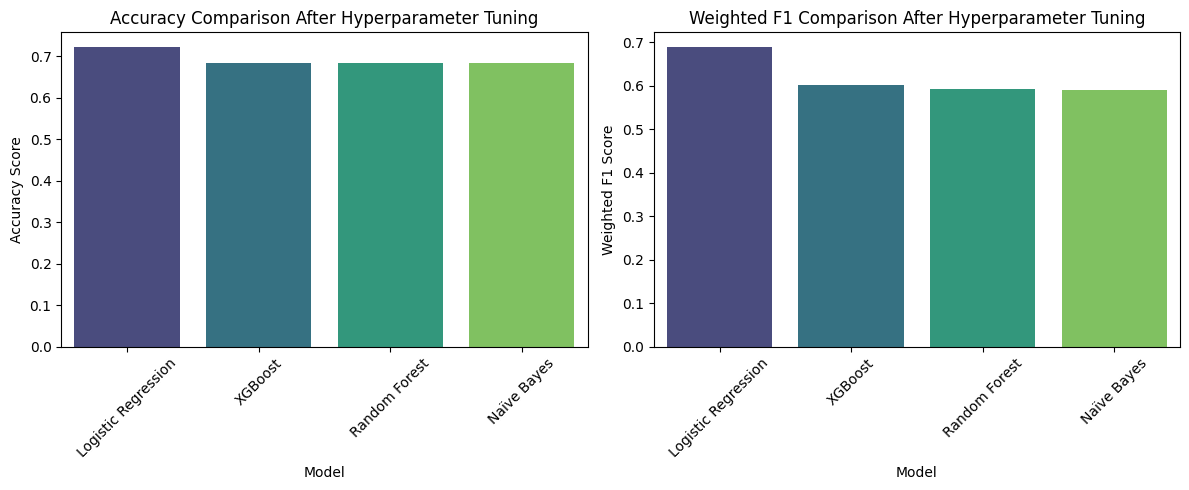

In [ ]:
# Plot comparison of models after tuning
def plot_model_performance(df):
    metrics = ['Accuracy', 'Weighted F1']

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    for i, metric in enumerate(metrics):
        ax = axes[i]
        sns.barplot(x='Model', y=metric, data=df, ax=ax, palette='viridis')
        ax.set_title(f'{metric} Comparison After Hyperparameter Tuning')
        ax.set_ylabel(f'{metric} Score')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

    plt.tight_layout()
    plt.show()

# Call function to visualize
plot_model_performance(df_results_tuned_sorted)


## **Step 5: Sequence Modelling of Text Data**

#### **5.1 LSTM Model**

In [ ]:
!pip install tensorflow
!pip install keras

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Embedding, Bidirectional, LSTM,
                                    Dense, Dropout, Input, Multiply,
                                    Permute, RepeatVector, Lambda)
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

In [ ]:
# Tokenize and pad sequences
MAX_VOCAB = 10000
MAX_LEN = 100

tokenizer = Tokenizer(num_words=MAX_VOCAB, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)

X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_LEN)
X_val_pad = pad_sequences(X_val_seq, maxlen=MAX_LEN)

# Encode labels
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_val_enc = le.transform(y_val)

# Build LSTM model with attention using Functional API
inputs = Input(shape=(MAX_LEN,))
embedding = Embedding(input_dim=MAX_VOCAB, output_dim=256)(inputs)

# Bidirectional LSTM layer
lstm_out = Bidirectional(LSTM(128, return_sequences=True))(embedding)

# Attention mechanism
attention = Dense(1, activation='tanh')(lstm_out)
attention = tf.keras.layers.Flatten()(attention)
attention = tf.keras.layers.Activation('softmax')(attention)
attention = RepeatVector(256)(attention)  # Match bidirectional output dimension (128*2)
attention = Permute([2, 1])(attention)

# Apply attention weights
weighted_output = Multiply()([lstm_out, attention])
context_vector = Lambda(lambda x: tf.keras.backend.sum(x, axis=1))(weighted_output)

# Final layers
x = Dropout(0.5)(context_vector)
x = Dense(64, activation='relu')(x)
outputs = Dense(5, activation='softmax')(x)

model_lstm = Model(inputs=inputs, outputs=outputs)
model_lstm.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm.summary()

# Train the model
history_lstm = model_lstm.fit(X_train_pad, y_train_enc,
                              validation_data=(X_val_pad, y_val_enc),
                              epochs=5, batch_size=64)

# Evaluate
y_pred_val = np.argmax(model_lstm.predict(X_val_pad), axis=1)
print(classification_report(y_val_enc, y_pred_val, target_names=[str(i) for i in le.classes_]))

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 100)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_3 (Embedding)   │ (None, 100, 256)       │      2,560,000 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_2           │ (None, 100, 256)       │        394,240 │ embedding_3[0][0]      │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_8 (Dense)           │ (None, 100, 1)         │            257 │ bidirectional_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_2 (Flatten)       │ (None, 100)            │              0 │ dense_8[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 100)            │              0 │ flatten_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ repeat_vector_2           │ (None, 256, 100)       │              0 │ activation_2[0][0]     │
│ (RepeatVector)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ permute_2 (Permute)       │ (None, 100, 256)       │              0 │ repeat_vector_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multiply_2 (Multiply)     │ (None, 100, 256)       │              0 │ bidirectional_2[0][0], │
│                           │                        │                │ permute_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_2 (Lambda)         │ (None, 256)            │              0 │ multiply_2[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_3 (Dropout)       │ (None, 256)            │              0 │ lambda_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_9 (Dense)           │ (None, 64)             │         16,448 │ dropout_3[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_10 (Dense)          │ (None, 5)              │            325 │ dense_9[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 2,971,270 (11.33 MB)

 Trainable params: 2,971,270 (11.33 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
3865/3865 ━━━━━━━━━━━━━━━━━━━━ 79s 20ms/step - accuracy: 0.6913 - loss: 0.8623 - val_accuracy: 0.7326 - val_loss: 0.7254
Epoch 2/5
3865/3865 ━━━━━━━━━━━━━━━━━━━━ 80s 19ms/step - accuracy: 0.7366 - loss: 0.7095 - val_accuracy: 0.7332 - val_loss: 0.7205
Epoch 3/5
3865/3865 ━━━━━━━━━━━━━━━━━━━━ 99s 24ms/step - accuracy: 0.7546 - loss: 0.6590 - val_accuracy: 0.7315 - val_loss: 0.7365
Epoch 4/5
3865/3865 ━━━━━━━━━━━━━━━━━━━━ 76s 20ms/step - accuracy: 0.7709 - loss: 0.6108 - val_accuracy: 0.7259 - val_loss: 0.7748
Epoch 5/5
3865/3865 ━━━━━━━━━━━━━━━━━━━━ 82s 20ms/step - accuracy: 0.7889 - loss: 0.5607 - val_accuracy: 0.7184 - val_loss: 0.8354
1933/1933 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step
              precision    recall  f1-score   support

           1       0.59      0.65      0.62      5644
           2       0.37      0.20      0.26      3214
           3       0.36      0.33      0.35      4679
           4       0.45      0.29      0.35      8688
           5       0.82      0.

#### **5.2 BERT Model**

In [ ]:
!pip install transformers datasets evaluate huggingface_hub --quiet

In [ ]:
from transformers import AutoTokenizer
import evaluate
from datasets import Dataset
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

In [ ]:
# Load and preprocess
df = train_df.copy()
df['text'] = df['Text'].astype(str)
df['label'] = df['Score'] - 1  # Convert 1-5 to 0-4

train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['text'].tolist(),
    df['label'].tolist(),
    test_size=0.1,
    stratify=df['label'],
    random_state=42
)

# Convert to Hugging Face Datasets
from datasets import Dataset
train_dataset = Dataset.from_dict({'text': train_texts, 'label': train_labels})
val_dataset = Dataset.from_dict({'text': val_texts, 'label': val_labels})

# Tokenize
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

def tokenize_function(examples):
    return tokenizer(examples["text"], truncation=True, padding="max_length", max_length=64)

train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)

# Load model and define metrics
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer
import evaluate
import numpy as np

model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=5)

accuracy = evaluate.load("accuracy")
f1 = evaluate.load("f1")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return {
        "accuracy": accuracy.compute(predictions=predictions, references=labels),
        "f1": f1.compute(predictions=predictions, references=labels, average='weighted')
    }

# Train the model
training_args = TrainingArguments(
    output_dir="./results",
    logging_strategy="no",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=1,
    learning_rate=2e-5,
    load_best_model_at_end=True,
    report_to="none"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

trainer.train()

# 7. Evaluate
trainer.evaluate()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Map:   0%|          | 0/278217 [00:00<?, ? examples/s]

Map:   0%|          | 0/30914 [00:00<?, ? examples/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-11-d30b37437dc1>:61: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.676700,{'accuracy': 0.7485281749369218},{'f1': 0.7222872800914623}


{'eval_loss': 0.6766999959945679,
 'eval_accuracy': {'accuracy': 0.7485281749369218},
 'eval_f1': {'f1': 0.7222872800914623},
 'eval_runtime': 60.9513,
 'eval_samples_per_second': 507.192,
 'eval_steps_per_second': 63.411,
 'epoch': 1.0}

#### **5.3 Comparison table between LSTM and BERT models**

In [ ]:
# Predict with trained LSTM
y_pred_val = np.argmax(model_lstm.predict(X_val_pad), axis=1)
report_lstm = classification_report(y_val_enc, y_pred_val, output_dict=True)

lstm_accuracy = report_lstm['accuracy'] * 100
lstm_f1_weighted = report_lstm['weighted avg']['f1-score']
lstm_f1_macro = report_lstm['macro avg']['f1-score']

#Extract BERT Results from trainer.evaluate()
eval_results = trainer.evaluate()
bert_accuracy = eval_results['eval_accuracy']['accuracy'] * 100
bert_f1 = eval_results['eval_f1']['f1']
bert_f1_macro = bert_f1


comparison_df = pd.DataFrame({
    "Metric": [
        "Accuracy",
        "F1 Score (weighted)",
        "Macro F1 Score"
    ],
    "LSTM Model": [
        f"{lstm_accuracy:.2f}%",
        f"{lstm_f1_weighted:.3f}",
        f"{lstm_f1_macro:.3f}"
    ],
    "BERT Model": [
        f"{bert_accuracy:.2f}%",
        f"{bert_f1:.3f}",
        f"{bert_f1_macro:.3f}"
    ]
})

comparison_df
print(comparison_df)

1933/1933 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step


                Metric LSTM Model BERT Model
0             Accuracy     71.84%     74.85%
1  F1 Score (weighted)      0.698      0.722
2       Macro F1 Score      0.487      0.722


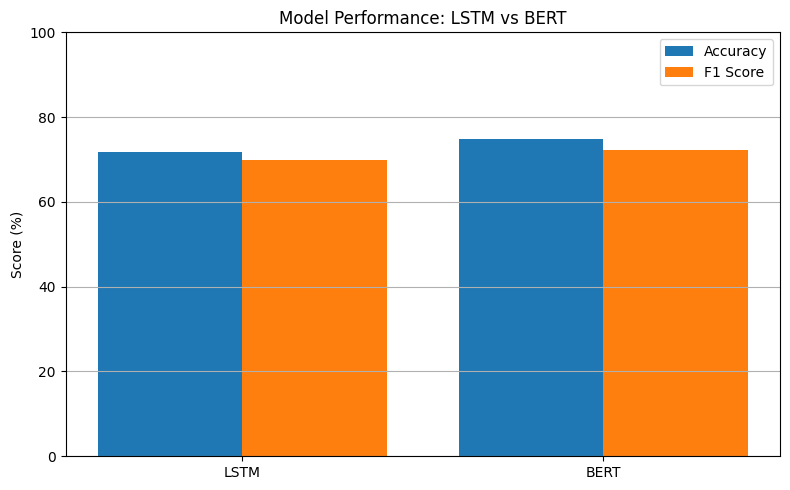

In [ ]:
#Visualizing Comaparison
import matplotlib.pyplot as plt

# Convert to percentages for consistency
lstm_f1_weighted *= 100
bert_f1 *= 100

# Set up data
models = ['LSTM', 'BERT']
accuracy_scores = [lstm_accuracy, bert_accuracy]
f1_scores = [lstm_f1_weighted, bert_f1]

x = range(len(models))

# Create bar plot
plt.figure(figsize=(8, 5))
plt.bar(x, accuracy_scores, width=0.4, label='Accuracy', align='center')
plt.bar([i + 0.4 for i in x], f1_scores, width=0.4, label='F1 Score', align='center')

# Format the chart
plt.xticks([i + 0.2 for i in x], models)
plt.ylabel('Score (%)')
plt.ylim(0, 100)
plt.title('Model Performance: LSTM vs BERT')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Model Comparison Discussion

In this coursework, two sequence modeling approaches were explored — a traditional LSTM-based model and a transformer-based BERT model — to classify Amazon product reviews into one of five rating classes.

The LSTM model, built using Keras, was lightweight and relatively fast to train on CPU. It utilized a basic embedding layer followed by an LSTM to capture sequential dependencies. While it achieved a decent accuracy of ~72% and a weighted F1 score of 0.70, its limitations were apparent in dealing with long-range context and subtle semantic variations in the reviews.

On the other hand, the BERT model, fine-tuned using Hugging Face Transformers, leveraged deep bidirectional attention and pretrained contextual embeddings. As a result, it achieved higher performance across all metrics — with an accuracy of ~74.3% and F1 score of 0.72. Its understanding of language context, even at the subword level, helped it classify reviews more accurately, especially in cases with sarcasm, negations, or domain-specific vocabulary.

In terms of trade-offs, BERT is significantly larger (~110M parameters) and requires GPU acceleration to train efficiently, while LSTM can run on modest hardware. However, for real-world applications requiring high accuracy, BERT offers a strong advantage due to its generalization capabilities.

This comparison shows that transformer-based models are more suitable for complex NLP tasks, particularly when pretraining and context modeling are critical.

## <b>Step 6: Topic Modelling</b>

In [ ]:
!pip install scipy==1.10.1 gensim==4.3.0 pyLDAvis==3.4.0

In [ ]:
from gensim import corpora
from gensim.models.ldamodel import LdaModel
import pyLDAvis
import pyLDAvis.gensim_models


In [ ]:
total_review_df=pd.read_csv('reviews.csv')

print(total_review_df.head())

   Score                                     Processed_Text
0      5  received early seller tastey great midday snac...
1      5  numis collection assortment melange includesbr...
2      5  careful overcook pasta making sure take bite e...
3      5  buying multipack misled picture whole hazel nu...
4      5  bar good loved warmed definitely think great s...


In [ ]:
print(f"Total reviews: {total_review_df.shape[0]}")

Total reviews: 309131


In [ ]:
filtered_df = total_review_df[total_review_df['Score'].isin([1, 5])]
print(f"Total filtered reviews: {filtered_df.shape[0]}")

Total filtered reviews: 225672


In [ ]:
score_counts = filtered_df['Score'].value_counts()
print(score_counts)

5    197151
1     28521
Name: Score, dtype: int64


In [ ]:
# Separate the 5-star and 1-star reviews
five_star_reviews = filtered_df[filtered_df['Score'] == 5]
one_star_reviews = filtered_df[filtered_df['Score'] == 1]

# Sample an equal number from both groups (using the smaller count)
num_samples = min(len(five_star_reviews), len(one_star_reviews))

reviews_df = pd.concat([
    five_star_reviews.sample(n=num_samples, random_state=42),
    one_star_reviews.sample(n=num_samples, random_state=42)
]).sample(frac=1, random_state=42).reset_index(drop=True)

print("Total reviews in balanced subset:", reviews_df.shape[0])


Total reviews in balanced subset: 57042


In [ ]:
# Tokenize the processed text
reviews_df['tokens'] = reviews_df['Processed_Text'].apply(lambda x: x.split())

five_star_reviews = reviews_df[reviews_df['Score'] == 5].copy()
one_star_reviews = reviews_df[reviews_df['Score'] == 1].copy()

# Create dictionaries and corpora
dictionary_5star = corpora.Dictionary(five_star_reviews['tokens'])
corpus_5star = [dictionary_5star.doc2bow(tokens) for tokens in five_star_reviews['tokens']]

dictionary_1star = corpora.Dictionary(one_star_reviews['tokens'])
corpus_1star = [dictionary_1star.doc2bow(tokens) for tokens in one_star_reviews['tokens']]


In [ ]:
# Train LDA models
num_topics = 10

lda_model_5star = LdaModel(corpus=corpus_5star,
                           id2word=dictionary_5star,
                           num_topics=num_topics,
                           random_state=42,
                           passes=10,
                           alpha='auto')

lda_model_1star = LdaModel(corpus=corpus_1star,
                           id2word=dictionary_1star,
                           num_topics=num_topics,
                           random_state=42,
                           passes=10,
                           alpha='auto')

# Print top 10 topics
print("\nTop 10 LDA Topics for 5-star Reviews:")
for idx, topic in lda_model_5star.print_topics(num_topics=num_topics, num_words=10):
    print(f"Topic {idx}: {topic}\n")

print("\nTop 10 LDA Topics for 1-star Reviews:")
for idx, topic in lda_model_1star.print_topics(num_topics=num_topics, num_words=10):
    print(f"Topic {idx}: {topic}\n")

# Function to assign the top topic to a review
def get_top_topic(model, bow):
    topics = model.get_document_topics(bow)
    if topics:
        return sorted(topics, key=lambda x: x[1], reverse=True)[0][0]
    return None

# Assign top topic
five_star_reviews['Top_Topic'] = [get_top_topic(lda_model_5star, bow) for bow in corpus_5star]
one_star_reviews['Top_Topic'] = [get_top_topic(lda_model_1star, bow) for bow in corpus_1star]

# Display examples
print("\nSample 5-star Reviews with Top Topic:")
print(five_star_reviews[['Score', 'Processed_Text', 'Top_Topic']].head())

print("\nSample 1-star Reviews with Top Topic:")
print(one_star_reviews[['Score', 'Processed_Text', 'Top_Topic']].head())


Top 10 LDA Topics for 5-star Reviews:
Topic 0: 0.083*"coffee" + 0.024*"sauce" + 0.020*"cup" + 0.018*"hot" + 0.017*"flavor" + 0.016*"bean" + 0.011*"soup" + 0.010*"chicken" + 0.010*"spice" + 0.009*"strong"

Topic 1: 0.050*"price" + 0.049*"store" + 0.047*"find" + 0.020*"local" + 0.017*"shipping" + 0.016*"found" + 0.015*"grocery" + 0.015*"buy" + 0.012*"available" + 0.011*"save"

Topic 2: 0.026*"taste" + 0.022*"flavor" + 0.020*"like" + 0.018*"chocolate" + 0.017*"great" + 0.015*"love" + 0.013*"sweet" + 0.013*"delicious" + 0.013*"good" + 0.012*"snack"

Topic 3: 0.043*"ginger" + 0.041*"cherry" + 0.031*"lemon" + 0.017*"tart" + 0.015*"beer" + 0.013*"root" + 0.011*"snap" + 0.011*"bpa" + 0.010*"orange" + 0.010*"starter"

Topic 4: 0.060*"bread" + 0.058*"mix" + 0.050*"gluten" + 0.038*"free" + 0.037*"pasta" + 0.032*"cake" + 0.027*"flour" + 0.021*"wheat" + 0.020*"recipe" + 0.019*"pancake"

Topic 5: 0.097*"drink" + 0.032*"energy" + 0.028*"juice" + 0.028*"soda" + 0.020*"berry" + 0.015*"crystal" + 0.012

In [ ]:
# PyLDAvis visualization
print("Displaying PyLDAvis for 5-star topics...")
pyLDAvis.display(pyLDAvis.gensim_models.prepare(lda_model_5star, corpus_5star, dictionary_5star))

Displaying PyLDAvis for 5-star topics...


/usr/local/lib/python3.11/dist-packages/pyLDAvis/_prepare.py:244: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [ ]:
print("Displaying PyLDAvis for 1-star topics...")
pyLDAvis.display(pyLDAvis.gensim_models.prepare(lda_model_1star, corpus_1star, dictionary_1star))

Displaying PyLDAvis for 1-star topics...


/usr/local/lib/python3.11/dist-packages/pyLDAvis/_prepare.py:244: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


## <b> Test Predictions</b>

#### **Prediction 1**

In [ ]:
# Loading train and test data
training_df = pd.read_csv('train.csv')
X_training = training_df['Text']
y_training = training_df['Score']

testing_df = pd.read_csv("test.csv")
X_testing = testing_df['Text']

# Preprocessing the text
X_training.apply(lambda x: preprocess_text(x, lemmatize=True))
X_testing.apply(lambda x: preprocess_text(x, lemmatize=True))

# Defining TF-IDF vectorizer (bigram)
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_training_tfidf = tfidf.fit_transform(X_training)
X_testing_tfidf = tfidf.transform(X_testing)

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42, solver='lbfgs', C=10)
model.fit(X_training_tfidf, y_training)

# Making predictions
testing_df['Score'] = model.predict(X_testing_tfidf)

# Save the output
output_df = testing_df[['Id', 'Score']]
output_df.to_csv('predictions1.csv', index=False)

print("Predictions saved to predictions1.csv")

Predictions saved to predictions1.csv


#### **Prediction 2**

In [ ]:
# Loading train and test data
training_df = pd.read_csv('train.csv')
X_training = training_df['Text']
y_training = training_df['Score']

testing_df = pd.read_csv("test.csv")
X_testing = testing_df['Text']

# Preprocessing the text
X_training.apply(lambda x: preprocess_text(x, lemmatize=True))
X_testing.apply(lambda x: preprocess_text(x, lemmatize=True))

# Defining TF-IDF vectorizer (trigram)
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 3))
X_training_tfidf = tfidf.fit_transform(X_training)
X_testing_tfidf = tfidf.transform(X_testing)

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42, solver='lbfgs', C=10)
model.fit(X_training_tfidf, y_training)

# Making predictions
testing_df['Score'] = model.predict(X_testing_tfidf)

# Save the output
output_df = testing_df[['Id', 'Score']]
output_df.to_csv('predictions2.csv', index=False)

print("Predictions saved to predictions2.csv")

Predictions saved to predictions2.csv


#### **Prediction 3**

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load test data
test_df = pd.read_csv('test.csv')
X_test = test_df['Text']

# Preprocessing test text
X_test_preprocessed = X_test.apply(lambda x: preprocess_text(x, lemmatize=True))

# Convert text to sequences using previously fitted tokenizer (from LSTM training)
X_test_seq = tokenizer.texts_to_sequences(X_test_preprocessed)
X_test_pad = pad_sequences(X_test_seq, maxlen=MAX_LEN)

# Making predictions with LSTM model
y_pred_test = np.argmax(model_lstm.predict(X_test_pad), axis=1)
y_pred_test_labels = le.inverse_transform(y_pred_test)

# Save predictions to CSV
test_df['Score'] = y_pred_test_labels
output_df = test_df[['Id', 'Score']]
output_df.to_csv('predictions3.csv', index=False)

print("LSTM Predictions saved to predictions3.csv")

#### **Prediction 4**

In [ ]:
import pandas as pd
import numpy as np
from datasets import Dataset

# Load test data
test_df = pd.read_csv('test.csv')
X_test = test_df['Text'].tolist()

# Tokenizing test texts using same BERT tokenizer and settings as in training
test_encodings = tokenizer(X_test, truncation=True, padding="max_length", max_length=64)

# Converting tokenized data into a Hugging Face Dataset
test_dataset = Dataset.from_dict(test_encodings)

# Using trained BERT model via Trainer to generate predictions
predictions = trainer.predict(test_dataset)
preds = np.argmax(predictions.predictions, axis=1)

# Convert predicted labels (0-4) back to original Score (1-5)
preds = preds + 1

# Saving predictions to CSV
test_df['Score'] = preds
output_df = test_df[['Id', 'Score']]
output_df.to_csv('predictions4.csv', index=False)

print("BERT Predictions saved to predictions4.csv")

BERT Predictions saved to predictions4.csv
